In [2]:
%cd ./drive/MyDrive

/content/drive/MyDrive


In [3]:
!pwd

/content/drive/MyDrive


Image Preprocessing

將解析度調整(Resize)為256像素的照片，然後隨機取大小為224x224的影像。接著隨機水平翻轉(Horizontal Flip)、隨機旋轉-20度到20度，並依照Pretrained ResNet的要求調整RGB的均數與標準差。 測試資料(Valid and Test)亦將解析度調整(Resize)成較短邊為256像素的照片，然後取圖片中心224x224的影像。

In [8]:
train_tfm = transforms.Compose([
    transforms.Resize(256),
    transforms.RandomCrop(224),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=(-20, 20)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

test_tfm = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

Build Dataset

In [20]:
batch_size = 32

subtrain_set = datasets.DatasetFolder("FaceMaskDatasetTry3/Train", loader=lambda x: Image.open(x), extensions="png", transform=train_tfm)
valid_set = datasets.DatasetFolder("FaceMaskDatasetTry3/Validation", loader=lambda x: Image.open(x), extensions="png", transform=test_tfm)
test_set = datasets.DatasetFolder("FaceMaskDatasetTry3/Test", loader=lambda x: Image.open(x), extensions="png", transform=test_tfm)

subtrain_loader = DataLoader(subtrain_set, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_set, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_set, batch_size=100, shuffle=False)

In [27]:
selfietest_set = datasets.DatasetFolder("深度學習Final_Selfie", loader=lambda x: Image.open(x).convert('RGB'), extensions="png", transform=test_tfm)

selfietest_loader = DataLoader(selfietest_set, batch_size=16, shuffle=False)

In [11]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print("Running on device: ", device)

Running on device:  cuda


In [12]:
import matplotlib.pyplot as plt
from PIL import Image
import os
import glob
import random
import pandas as pd
import seaborn as sns
from torchvision import datasets ,models,transforms
from torch.utils import data
import torch.nn as nn
import torchvision
import numpy as np 
import torch
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import gc

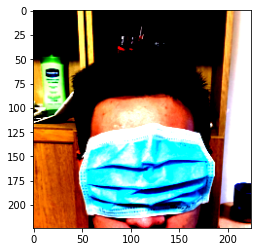

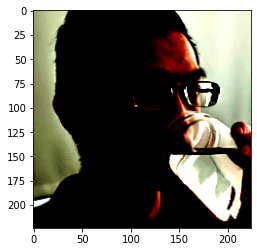

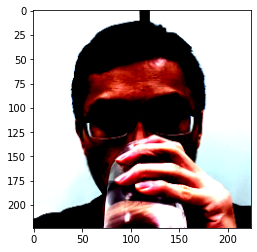

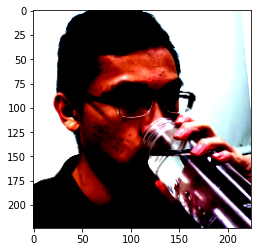

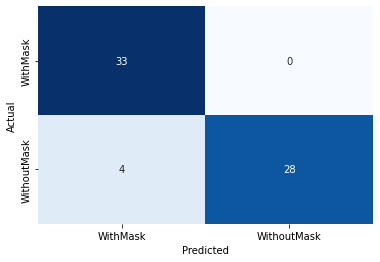

Test Accuracy: 93.84615384615384%
=======================Individual Accuracy===========================
WithMask: 100.0%
WithoutMask: 87.5%


In [29]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
loader = selfietest_loader
best_model = torch.load('/content/drive/MyDrive/深度學習Final/resnet50_FT_sgd_3_3.pkl')
best_model.eval()
targets_list=[]
preds_list=[]
#count = 0
with torch.no_grad():
    for inputs, targets in loader:
      #count += 1
      inputs, targets = inputs.to(device), targets.to(device)
      outputs = best_model(inputs)
      _, preds = torch.max(outputs, dim=1)
      targets_list.extend(targets.cpu().detach().numpy())
      preds_list.extend(preds.cpu().detach().numpy())
      #print(targets.cpu().detach().numpy() != preds.cpu().detach().numpy())
      #if count%10 == 0:
        #print('Test: 第',count,'個batch')
      for not_match in np.where(targets.cpu().detach().numpy() != preds.cpu().detach().numpy())[0]:
        img = inputs.cpu().detach().numpy()[not_match,:,:,:]
        img = img.swapaxes(0, 1)
        img = img.swapaxes(1, 2)
        plt.imshow(img)
        plt.show()
    acc = accuracy_score(targets_list, preds_list)
    mat = confusion_matrix(targets_list, preds_list)
    sns.heatmap(mat,annot=True, fmt='d', cbar=False, cmap=plt.cm.Blues,xticklabels=labels,yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()       
print(f'Test Accuracy: {acc*100}%')
print('=======================Individual Accuracy===========================')
for i, acc in enumerate(mat):
  print(f'{labels[i]}: {(mat[i][i]/sum(mat[i]))*100}%')

